In [37]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv(r'C:\Users\nari9\OneDrive\Documents\PG\Assignments\Summer3\BDA\Project\Data\MergedDataMoreSources.csv')

In [3]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Close,Company
0,0,2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.596463,Apple Inc
1,1,2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.293170,Apple Inc
2,2,2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.341362,Apple Inc
3,3,2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.052206,Apple Inc
4,4,2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.196784,Apple Inc


In [4]:
del data['Unnamed: 0']

In [5]:
data.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Close
count,201036.000000,201036.000000,201036.000000,201036.000000,2.010360e+05,201037.000000,201037.000000,201036.000000
mean,81.356499,82.380660,80.296479,81.363333,1.057965e+07,0.004743,0.597068,63.676853
std,134.707108,135.994564,133.310366,134.686682,1.703707e+07,1.268071,0.491587,113.663902
min,0.060417,0.061042,0.053958,0.061042,0.000000e+00,0.000000,0.000000,0.061042
25%,24.010000,24.420000,23.570000,24.000000,1.992476e+06,0.000000,0.000000,15.840000
50%,40.570000,41.200000,39.995001,40.599998,4.545950e+06,0.000000,1.000000,30.000354
75%,70.440001,71.380000,69.550001,70.438125,1.102924e+07,0.000000,1.000000,58.927676
max,2210.930000,2228.990000,2174.070000,2206.090000,5.910522e+08,567.971668,7.000000,2206.090000


In [14]:
apple_data = data[data['Company'] == 'Apple Inc']

In [7]:
apple_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Close,Company
0,2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.596463,Apple Inc
1,2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.293170,Apple Inc
2,2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.341362,Apple Inc
3,2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.052206,Apple Inc
4,2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.196784,Apple Inc


In [8]:
apple_data.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Close
count,4585.000000,4585.000000,4585.000000,4585.000000,4.585000e+03,4585.000000,4585.000000,4585.000000
mean,169.456808,171.300185,167.403564,169.386743,2.272219e+07,0.006646,1.001745,43.209200
std,167.768369,169.112469,166.150359,167.652602,1.836345e+07,0.125966,0.091031,47.406184
min,12.990000,13.190000,12.720000,13.120000,7.025000e+05,0.000000,1.000000,0.843051
25%,46.790000,47.600000,46.210000,46.890000,8.559200e+06,0.000000,1.000000,3.630519
50%,111.950000,113.370000,110.270000,112.010000,1.861380e+07,0.000000,1.000000,21.572350
75%,196.420000,199.330000,194.060000,196.230000,3.119008e+07,0.000000,1.000000,73.708186
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,181.720000


In [12]:
apple_data = apple_data[apple_data['Date']>='2010']

In [13]:
apple_data

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Close,Company
2515,2010-01-04,213.43,214.50,212.38,214.010,17633200.0,0.0,1.0,27.503268,Apple Inc
2516,2010-01-05,214.60,215.59,213.25,214.380,21496600.0,0.0,1.0,27.550818,Apple Inc
2517,2010-01-06,214.38,215.23,210.75,210.970,19720000.0,0.0,1.0,27.112585,Apple Inc
2518,2010-01-07,211.75,212.00,209.05,210.580,17040400.0,0.0,1.0,27.062465,Apple Inc
2519,2010-01-08,210.30,212.00,209.06,211.980,15986100.0,0.0,1.0,27.242385,Apple Inc
...,...,...,...,...,...,...,...,...,...,...
4580,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,171.270000,Apple Inc
4581,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,168.845000,Apple Inc
4582,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,164.940000,Apple Inc
4583,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,172.770000,Apple Inc


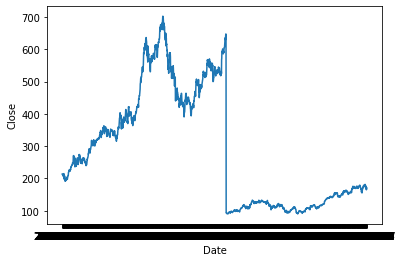

In [14]:
sb.lineplot(x = "Date", y = "Close", data = apple_data)

In [6]:
data[data.isnull().any(axis = 1)]

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Close,Company
139674,2017-02-20,NaN,NaN,NaN,NaN,NaN,0.1,0.0,NaN,Applied Materials Inc


In [7]:
data.drop(data.index[139674], inplace = True)

In [8]:
data[data.isnull().any(axis = 1)]

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Close,Company


In [10]:
companies = data['Company'].unique()

In [29]:
comp_data = data[data['Company'] == 'Tesla Inc']
comp_data.describe()['Adj. Close']

count    1949.000000
mean      158.641133
std       111.041316
min        15.800000
25%        31.600000
50%       192.690000
75%       240.240000
max       385.000000
Name: Adj. Close, dtype: float64

In [47]:
agg_data = pd.DataFrame(columns=['mean','std','min','max', 'Company'])
i = 0
for company in companies:
    small_data = data[data['Company'] == company]
    desc = (small_data.describe()['Adj. Close'])
    agg_data.loc[i] = [desc[1], desc[2], desc[3], desc[7], company]
    i+=1

print (agg_data)
agg_data.to_csv('Aggregated_AdjClose.csv')



mean         std          min          max  \
0     43.209200   47.406184     0.843051   181.720000   
1     29.083795   16.094881    12.114718    96.770000   
2    225.876797  293.332981     5.970000  1598.390000   
3     89.482903   48.536888    17.729000   193.090000   
4    483.625631  278.054454    50.159839  1187.560000   
5     21.565133    8.745996     8.947651    52.480000   
6     25.802091   41.469297     2.279540   250.480000   
7     21.376359    9.333767     7.106825    66.159586   
8     15.029162    9.704326     4.786868    42.990000   
9     46.772247   37.187128     8.319143   229.750000   
10    37.669421   55.287353     0.372857   331.440000   
11    56.615425   25.464948    20.234732   121.760000   
12    47.852171   15.044032    30.630000    85.450000   
13   158.641133  111.041316    15.800000   385.000000   
14    70.599003   47.160541    21.182804   198.910000   
15    77.978731   42.624777    27.183964   198.000000   
16    28.846405   16.370354     7.421251  

In [30]:
train_data = agg_data[["mean", "std", "min", "max"]]
train_data.head()

,mean,std,min,max
0,43.209200,47.406184,0.843051,181.72
1,29.083795,16.094881,12.114718,96.77
2,225.876797,293.332981,5.970000,1598.39
3,89.482903,48.536888,17.729000,193.09
4,483.625631,278.054454,50.159839,1187.56


In [34]:
sse = []
ks = []
for k in range(1,20,1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_data)
    sse.append(kmeans.inertia_)
    ks.append(k)

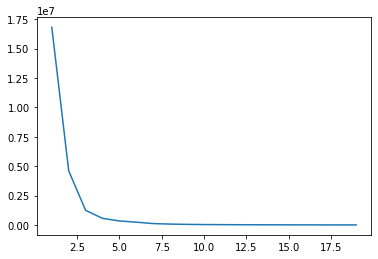

In [35]:
ax = sb.lineplot(x = ks, y = sse)
ax.set(xlabel = 'K clusters', ylabel = 'SSE')
plt.show()

In [36]:
sse

[16814188.231520876,
 4607530.003022897,
 1245979.9548031026,
 562921.280713891,
 342728.90075854666,
 239029.25733651262,
 118896.13421544785,
 76104.41877240475,
 51100.37537032887,
 35546.77945347488,
 28492.401515561418,
 22066.821222082603,
 18198.55066270799,
 14767.244172798084,
 12069.807590629689,
 9627.964706749826,
 7918.503521201378,
 6145.133451099018,
 5524.936066589422]

In [43]:
sil = []
ks = []
for k in range(2,20,2):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_data)
    y = kmeans.predict(train_data)
    #print (len(y))
    sil.append(silhouette_score(train_data,y))
    #sse.append(kmeans.inertia_)
    ks.append(k)

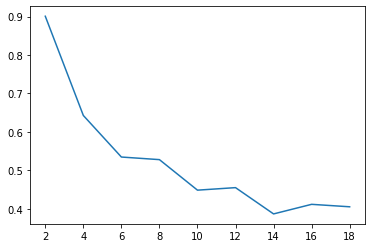

In [44]:
sb.lineplot(x = ks, y = sil)
plt.show()

In [52]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(train_data)
values = kmeans.predict(train_data)
agg_data['Clusters'] = values

In [53]:
agg_data

,mean,std,min,max,Company,Clusters
0,43.209200,47.406184,0.843051,181.720000,Apple Inc,2
1,29.083795,16.094881,12.114718,96.770000,Microsoft Corp,2
2,225.876797,293.332981,5.970000,1598.390000,Amazon.com Inc,3
3,89.482903,48.536888,17.729000,193.090000,Facebook Inc,2
4,483.625631,278.054454,50.159839,1187.560000,Alphabet Inc,3
5,21.565133,8.745996,8.947651,52.480000,Intel Corp,2
6,25.802091,41.469297,2.279540,250.480000,NVIDIA Corp,2
7,21.376359,9.333767,7.106825,66.159586,Cisco Systems Inc,2
8,15.029162,9.704326,4.786868,42.990000,Comcast Corp,2
9,46.772247,37.187128,8.319143,229.750000,Adobe Inc,2


In [71]:
agg_data[agg_data['Clusters'] == 0].describe()

,mean,std,min,max,Clusters
count,11.000000,11.000000,11.000000,11.000000,11.0
mean,108.874337,101.262126,9.264684,440.913009,0.0
std,43.910216,39.895767,9.187332,170.880885,0.0
min,37.669421,55.287353,0.372857,284.620000,0.0
25%,77.613675,69.454883,2.239167,335.491530,0.0
50%,99.902445,100.876905,6.095440,385.000000,0.0
75%,147.816743,114.541657,14.393295,462.895005,0.0
max,168.336466,170.550218,29.500000,886.780029,0.0


In [72]:
agg_data[agg_data['Clusters'] == 1].describe()

,mean,std,min,max,Clusters
count,1.000000,1.000000,1.00,1.00,1.0
mean,2149.142857,37.526141,2077.56,2206.09,1.0
std,NaN,NaN,NaN,NaN,NaN
min,2149.142857,37.526141,2077.56,2206.09,1.0
25%,2149.142857,37.526141,2077.56,2206.09,1.0
50%,2149.142857,37.526141,2077.56,2206.09,1.0
75%,2149.142857,37.526141,2077.56,2206.09,1.0
max,2149.142857,37.526141,2077.56,2206.09,1.0


In [73]:
agg_data[agg_data['Clusters'] == 2].describe()

,mean,std,min,max,Clusters
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,37.077609,24.398233,9.706322,115.979161,2.0
std,17.975577,12.762529,7.864624,59.975975,0.0
min,13.312196,7.367743,0.061042,42.990000,2.0
25%,21.473231,15.547535,2.466324,67.731323,2.0
50%,32.099574,20.109949,8.319143,96.562500,2.0
75%,47.312209,34.693670,13.700380,162.785000,2.0
max,89.482903,48.536888,30.630000,250.480000,2.0


In [74]:
agg_data[agg_data['Clusters'] == 3].describe()

,mean,std,min,max,Clusters
count,2.000000,2.000000,2.000000,2.000000,2.0
mean,354.751214,285.693718,28.064919,1392.975000,3.0
std,182.255948,10.803550,31.246935,290.500679,0.0
min,225.876797,278.054454,5.970000,1187.560000,3.0
25%,290.314006,281.874086,17.017460,1290.267500,3.0
50%,354.751214,285.693718,28.064919,1392.975000,3.0
75%,419.188422,289.513349,39.112379,1495.682500,3.0
max,483.625631,293.332981,50.159839,1598.390000,3.0


In [75]:
agg_data = pd.DataFrame(columns=['mean','std', 'Company'])
i = 0
for company in companies:
    small_data = data[data['Company'] == company]
    desc = (small_data.describe()['Adj. Close'])
    agg_data.loc[i] = [desc[1], desc[2], company]
    i+=1

print (agg_data)


mean         std                        Company
0     43.209200   47.406184                      Apple Inc
1     29.083795   16.094881                 Microsoft Corp
2    225.876797  293.332981                 Amazon.com Inc
3     89.482903   48.536888                   Facebook Inc
4    483.625631  278.054454                   Alphabet Inc
5     21.565133    8.745996                     Intel Corp
6     25.802091   41.469297                    NVIDIA Corp
7     21.376359    9.333767              Cisco Systems Inc
8     15.029162    9.704326                   Comcast Corp
9     46.772247   37.187128                      Adobe Inc
10    37.669421   55.287353                    Netflix Inc
11    56.615425   25.464948                    PepsiCo Inc
12    47.852171   15.044032            PayPal Holdings Inc
13   158.641133  111.041316                      Tesla Inc
14    70.599003   47.160541          Costco Wholesale Corp
15    77.978731   42.624777                      Amgen Inc
16    28

In [85]:
train_data = agg_data[[ "std"]]
train_data.head()

,std
0,47.406184
1,16.094881
2,293.332981
3,48.536888
4,278.054454


In [86]:
sse = []
ks = []
for k in range(1,20,1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_data)
    sse.append(kmeans.inertia_)
    ks.append(k)

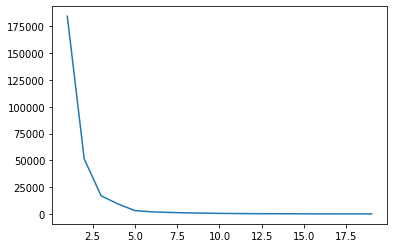

In [87]:
sb.lineplot(x = ks, y = sse)
plt.show()

In [88]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(train_data)
values = kmeans.predict(train_data)
agg_data['Clusters'] = values

In [94]:
agg_data[agg_data['Clusters'] == 0]

,mean,std,Company,Clusters
0,43.209200,47.406184,Apple Inc,0
3,89.482903,48.536888,Facebook Inc,0
6,25.802091,41.469297,NVIDIA Corp,0
9,46.772247,37.187128,Adobe Inc,0
10,37.669421,55.287353,Netflix Inc,0
14,70.599003,47.160541,Costco Wholesale Corp,0
15,77.978731,42.624777,Amgen Inc,0
22,32.099574,31.575249,Gilead Sciences Inc,0
24,48.320073,36.580681,Intuit Inc,0
25,2149.142857,37.526141,Booking Holdings Inc,0


In [95]:
agg_data[agg_data['Clusters'] == 1]

,mean,std,Company,Clusters
2,225.876797,293.332981,Amazon.com Inc,1
4,483.625631,278.054454,Alphabet Inc,1


In [96]:
agg_data[agg_data['Clusters'] == 2]

,mean,std,Company,Clusters
13,158.641133,111.041316,Tesla Inc,2
17,88.009380,76.858795,Broadcom Inc,2
19,151.521617,102.875631,Charter Communications Inc,2
28,99.902445,93.100686,Intuitive Surgical Inc,2
37,89.629530,100.876905,Illumina Inc,2
38,144.111870,118.041998,Biogen Inc,2


In [97]:
agg_data[agg_data['Clusters'] == 3]

,mean,std,Company,Clusters
1,29.083795,16.094881,Microsoft Corp,3
5,21.565133,8.745996,Intel Corp,3
7,21.376359,9.333767,Cisco Systems Inc,3
8,15.029162,9.704326,Comcast Corp,3
11,56.615425,25.464948,PepsiCo Inc,3
12,47.852171,15.044032,PayPal Holdings Inc,3
16,28.846405,16.370354,T-Mobile US Inc,3
18,33.660263,19.956697,Texas Instruments Inc,3
20,39.447864,16.051038,QUALCOMM Inc,3
21,20.816179,18.073502,Starbucks Corp,3


In [98]:
agg_data[agg_data['Clusters'] == 4]

,mean,std,Company,Clusters
30,129.453201,167.317238,Regeneron Pharmaceuticals Inc,4
42,168.336466,170.550218,MercadoLibre Inc,4
